# Bike sharing assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider `BoomBikes` is looking to accelerate its revenue. This company aspires to understand the demand for shared bikes among the people and to cater to the people's needs and stand out from other service providers and make huge profits.

Essentially, the company wants —

-  To understand the factors on which the demand for these shared bikes depends, e.g season, whether day is a holiday or not, day of the week, weather situation, temperature, feeling temperature, humidity, windspeed, no. of casual users, no. of registered users, etc.

- To create a linear model that quantitatively relates count of total rental bikes with the above listed factors.

- To know the accuracy of the model, i.e. how well these variables can predict count of total rental bikes.

The company can then accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

The steps we will follow in this assignment are as follows:
1. Reading, understanding the data
2. Visualising the data
3. Data Preparation
4. Splitting the Data into Training and Testing Sets
5. Building a linear model
5. Training the model
6. Residual analysis
7. Predictions and evaluation on the test set

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Read the day.csv file, and view some sample records

day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# The column 'instant' is just a record index and cannot be used as a predictor. So dropping it.
day.drop('instant', axis=1, inplace=True)

# The column 'dteday' is just a date value and cannot be used as a predictor. So dropping it.
day.drop('dteday', axis=1, inplace=True)

# The columns 'casual' and 'registered' cannot be used as predictors as their sum is the target variable 'cnt'. So dropping them.
day.drop(['casual', 'registered'], axis=1, inplace=True)

In [5]:
# Data frame shape
day.shape

(730, 12)

In [6]:
# Data frame columns information
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [7]:
# Data frame statitical information of all the columns
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data


Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.
Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `cnt`.

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

#### Visualising Numeric Variables

The numeric variables are:
- temp
- atemp
- hum
- windspeed

Let's make a scatter plots of all the numeric variables

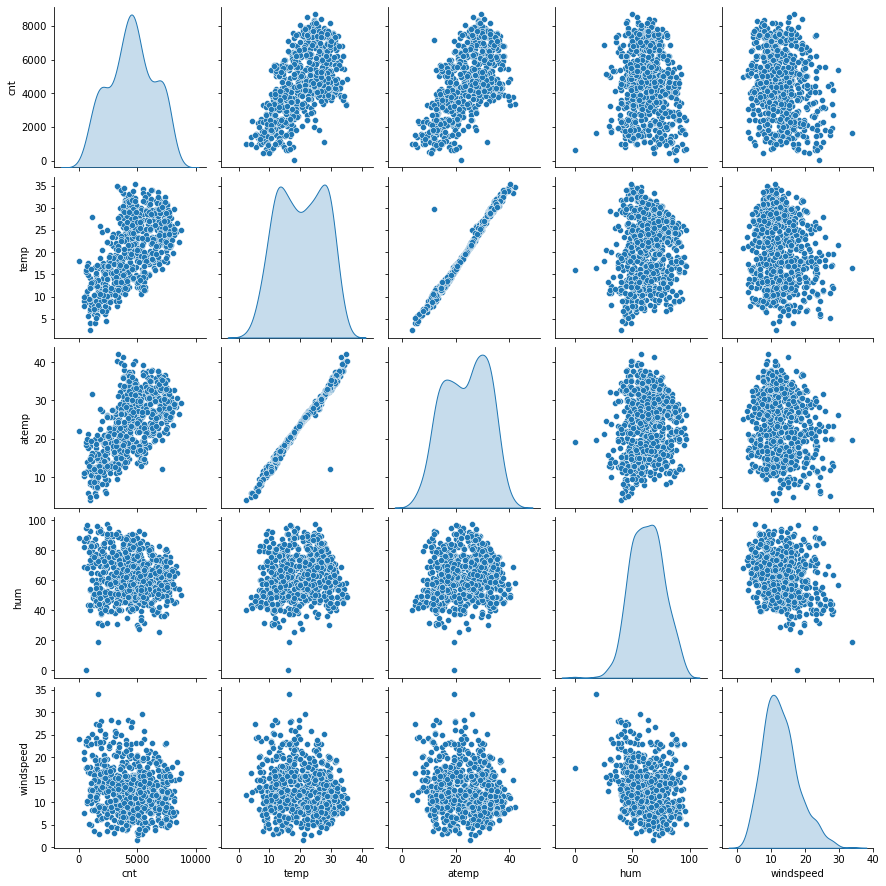

In [9]:
d = day[['cnt', 'temp', 'atemp', 'hum', 'windspeed']]
sns.pairplot(d, diag_kind = 'kde')
plt.show()

As it can be seen from the above scatter plots, the variables `temp` and `atemp` display postive correlation with each other also with target variable `cnt`.

#### Visualising Categorical Variables

There are a few categorical variables as well.The categorical variables are:
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit

##### Encoding categorical variables
The values of categorical variables are presented in numerical format. Lets Encode each of them as per the data dictionary.

In [10]:
def season_enc(x):
    return x.map({1:'Spring', 2:'summer', 3:'fall', 4:'winter'})
def weathersit_enc(x):
    return x.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

day_enc = day.copy()
day_enc[['season']] = day_enc[['season']].apply(season_enc)
day_enc[['weathersit']] = day_enc[['weathersit']].apply(weathersit_enc)
day_enc.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Let's make a boxplot for these categorical variables.

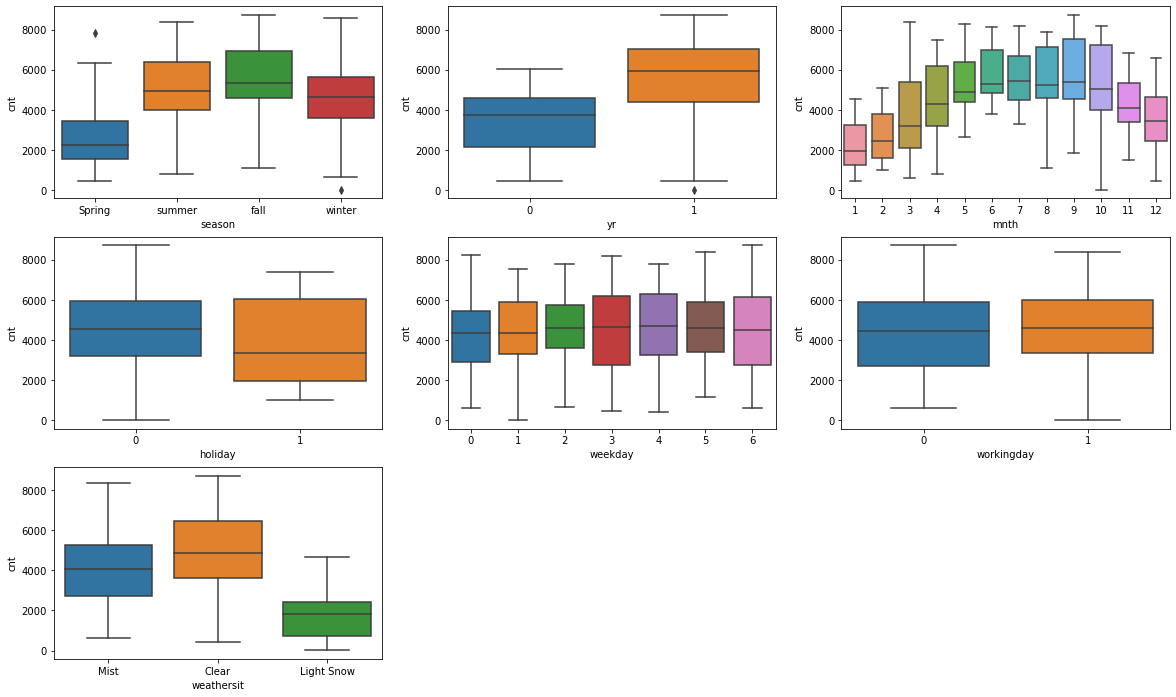

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day_enc)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day_enc)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day_enc)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day_enc)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day_enc)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day_enc)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day_enc)
plt.show()

From the above box-plots, we can observe that:
- `season`, `mnth` and `weathersit` have some influencing pattern on `cnt`
- `cnt` is less on holidays
- `weekay`and `workingday`don't have significant influence on `cnt` 
- `cnt` is more in the year 2019 than the previous year 2018

## Step 3: Data Preparation

### Dummy Variables

- The variable `season` has 4 levels.
- The variable `weathersit` has 3 levels.

We need to convert these levels into integer as well. 
For this, we will use something called `dummy variables`.

In [12]:
# Get the dummy variables for the feature `season` and store it in a new variable - 'status'
status = pd.get_dummies(day_enc['season'])

In [13]:
# Checking the dataset 'status'' looks like'
status.head()

,Spring,fall,summer,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


Now, we don't need 3 columns. We can drop the `season` column, as the type of season can be identified with just the last 3 columns where — 
- `000` will correspond to `Spring`
- `001` will correspond to `winter`
- `010` will correspond to `summer`
- `100` will correspond to `fall`

In [14]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(day_enc['season'], drop_first = True)

In [15]:
# Add the results to the original day_enc dataframe
day_enc = pd.concat([day_enc, status], axis = 1)

In [16]:
# Now let's see the head of our dataframe.

day_enc.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,fall,summer,winter
0,Spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,Spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [17]:
# Drop 'season' as we have created the dummies for it
day_enc.drop(['season'], axis = 1, inplace = True)
day_enc.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,fall,summer,winter
0,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


Similarly, we will create dummies column `weathersit` values, append them to the original dataframe and drop the original column.

In [18]:
# Get the dummy variables for the feature `weathersit` and store it in a new variable - 'status'
status = pd.get_dummies(day_enc['weathersit'], drop_first = True)

# Add the results to the original day_enc dataframe
day_enc = pd.concat([day_enc, status], axis = 1)

# Drop 'weathersit' as we have created the dummies for it
day_enc.drop(['weathersit'], axis = 1, inplace = True)

day_enc.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,fall,summer,winter,Light Snow,Mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


Let us see the correlation heatmap

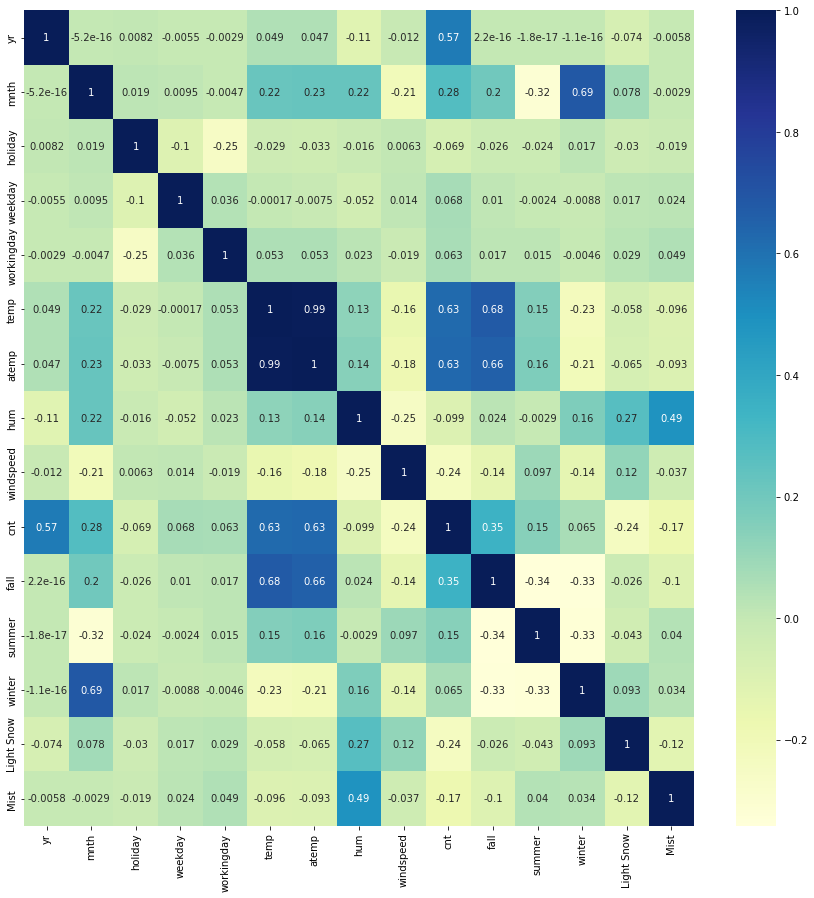

In [20]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(day_enc.corr(), cmap="YlGnBu", annot = True)
plt.show()

From the above headmap we can see that:
- `cnt` is correlated with `yr`, `temp` and `atemp`.
- `temp` and `atemp` are highly correlated.
- There significant corrleation between `fall`, `temp` and `atemp`.
- There significant corrleation between `humidity` and `mist`.